# Insurance Claim Fraud Detection

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
#checking for shape
print('Dataset contains')
print('Number of columns :',df.shape[0])
print('Number of rows :',df.shape[1])

Dataset contains
Number of columns : 1000
Number of rows : 40


In [9]:
#checking for datatype 
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

* There is no presence of null values
* There are 1 column is of float datatype,17 columns are of int datatype,21 columns are of object datatype.


In [11]:
#checking for unique values
df.nunique()

months_as_customer             391
age                             46
policy_number                  999
policy_bind_date               950
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  11
insured_zip                    994
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_location              999
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries     

In [12]:
#checking for value counts 
for i in df.columns:
    print(i,':\n')
    print(df[i].value_counts())
    print('*'*50)

months_as_customer :

194    8
230    7
140    7
101    7
128    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**************************************************
age :

43    49
39    48
41    45
34    44
30    42
38    42
31    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
42    32
36    32
44    32
28    30
45    26
26    26
47    24
48    24
27    24
57    16
49    14
25    14
55    14
50    13
53    13
54    10
24    10
61    10
60     9
51     9
56     8
58     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**************************************************
policy_number :

342868    1
757644    1
223404    1
991480    1
804219    1
         ..
620855    1
583169    1
337677    1
445973    1
556080    1
Name: policy_number, Length: 999, dtype: int64
**************************************************
policy_bind_date :

05-08-1992   

Here we observe '?' in some columns lets check for this.

In [13]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [14]:
#replacing the '?' value
col=['collision_type','property_damage','police_report_available']
for i in col:
    df[i]=df[i].replace('?',np.nan)

In [15]:
#checking for duplicated values
df.duplicated().sum()

0

There are no presence of duplicated values in the dataset

In [16]:
#checking for null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<Axes: >

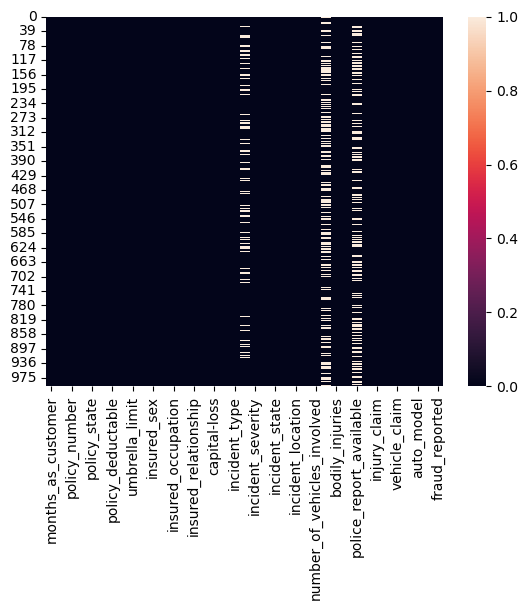

In [17]:
sns.heatmap(df.isnull())

In [18]:
#handling null values
col=['collision_type','property_damage','police_report_available']
for i in col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [19]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [20]:
#separating numerical and categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_col.append(i)
print('Categorical column :\n',cat_col)
print('\n')

num_col=[]
for i in df.columns:
    if df[i].dtypes!='object':
        num_col.append(i)
print('Numerical column :\n',num_col)

Categorical column :
 ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical column :
 ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


# Stastical Analysis

In [21]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


* All counts are same represents there is no presence of null values
* There is gap between 75th percentile and maximum value represents the presence of outliers.
* Minimum age is 19,maximum age is 64.
* Minimum policy_annual_premium is 433 and maximum is 2047

# Exploratory Data Analysis(EDA) And Visualisation

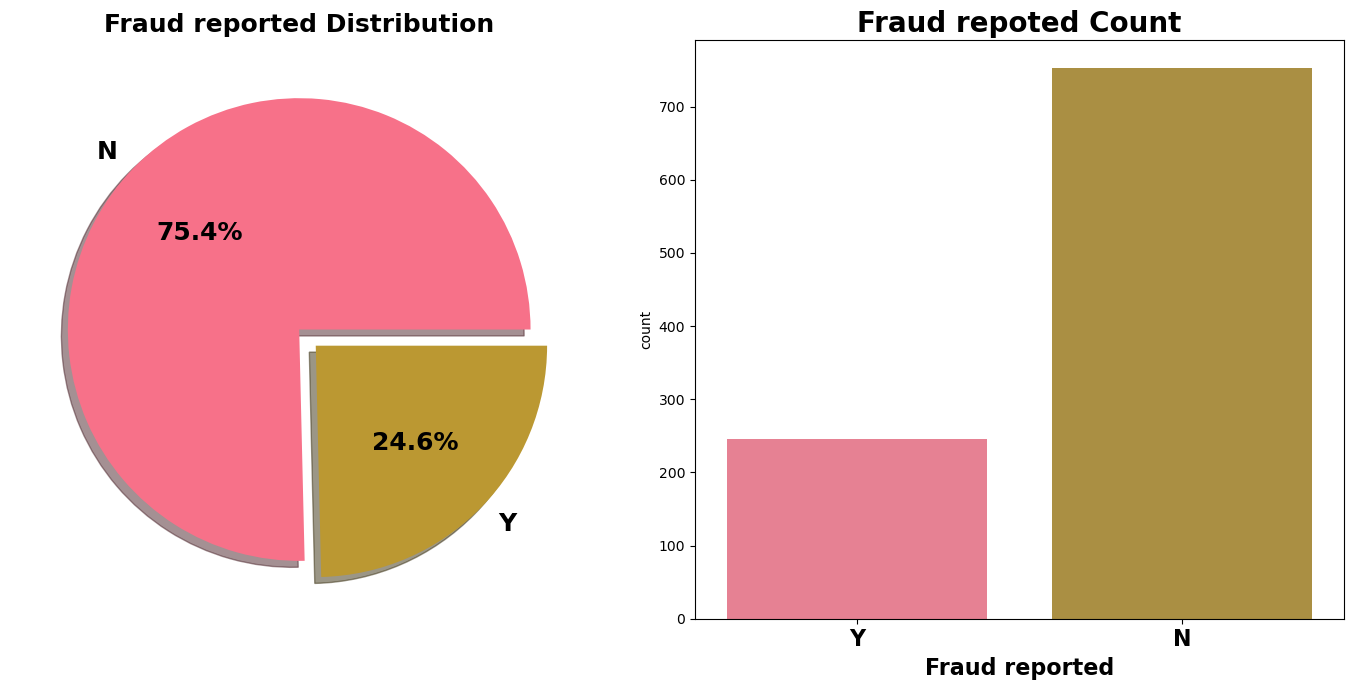

In [49]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud reported Distribution', fontsize=18,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud repoted Count',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Fraud reported",fontsize=16,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.show()

24.6% cases are fraud out of all cases.

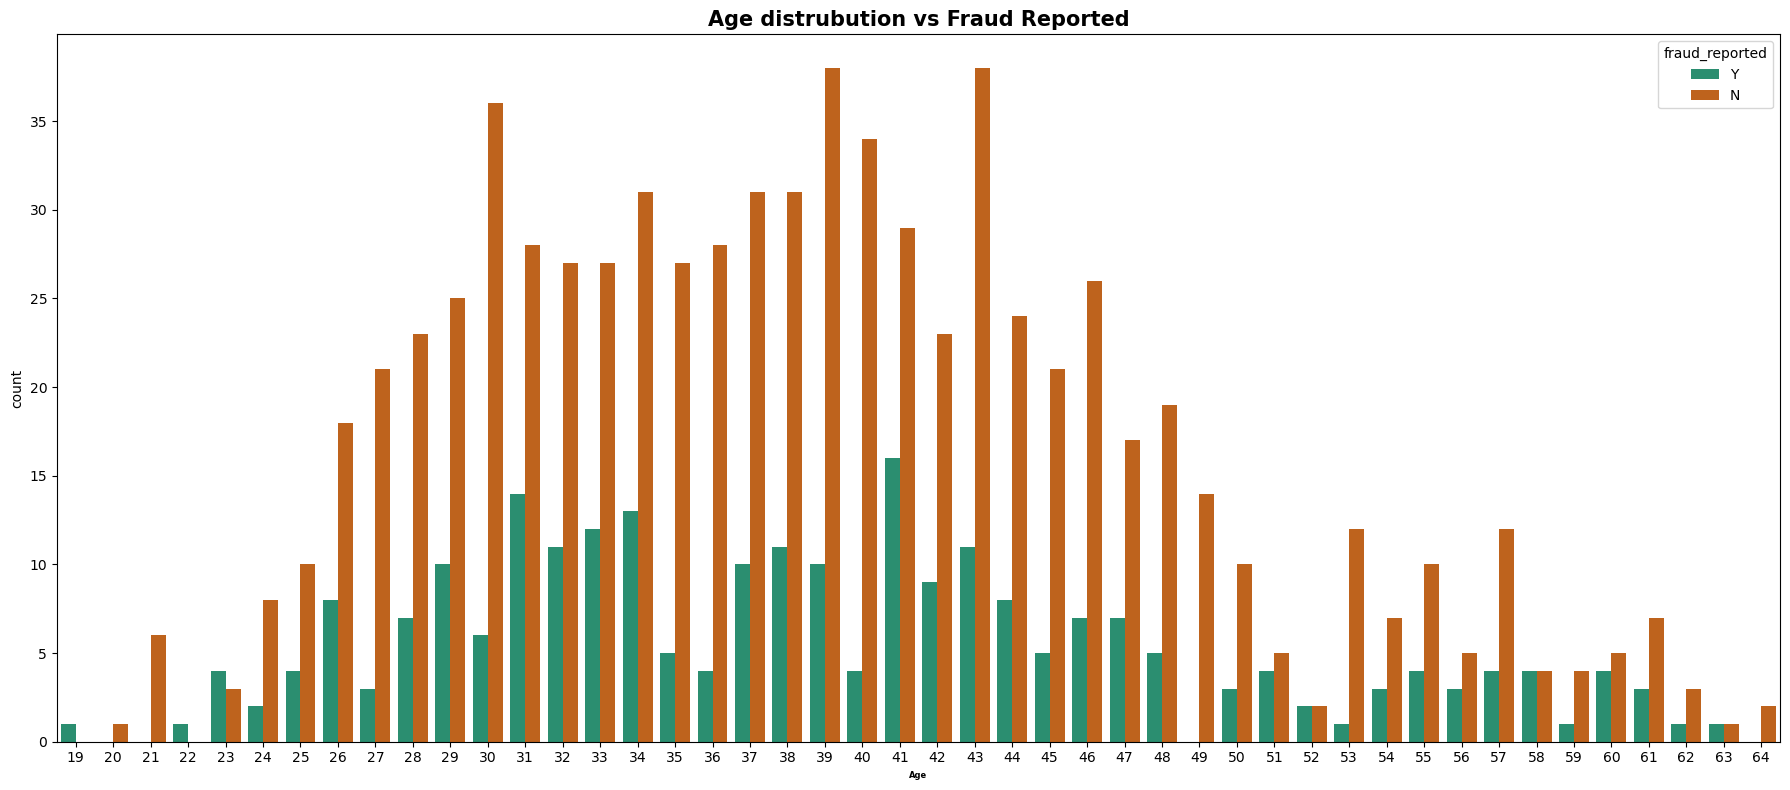

In [55]:
plt.figure(figsize=(18,8))
sns.set_palette('Dark2')
sns.countplot(x=df['age'],hue=df['fraud_reported'])
plt.title('Age distrubution vs Fraud Reported',fontweight='bold',fontsize=15)
plt.xlabel('Age',fontweight='bold',fontsize=6)
plt.show()

Individuals aged between 26 and 44 are associated with a higher number of reported fraud cases.

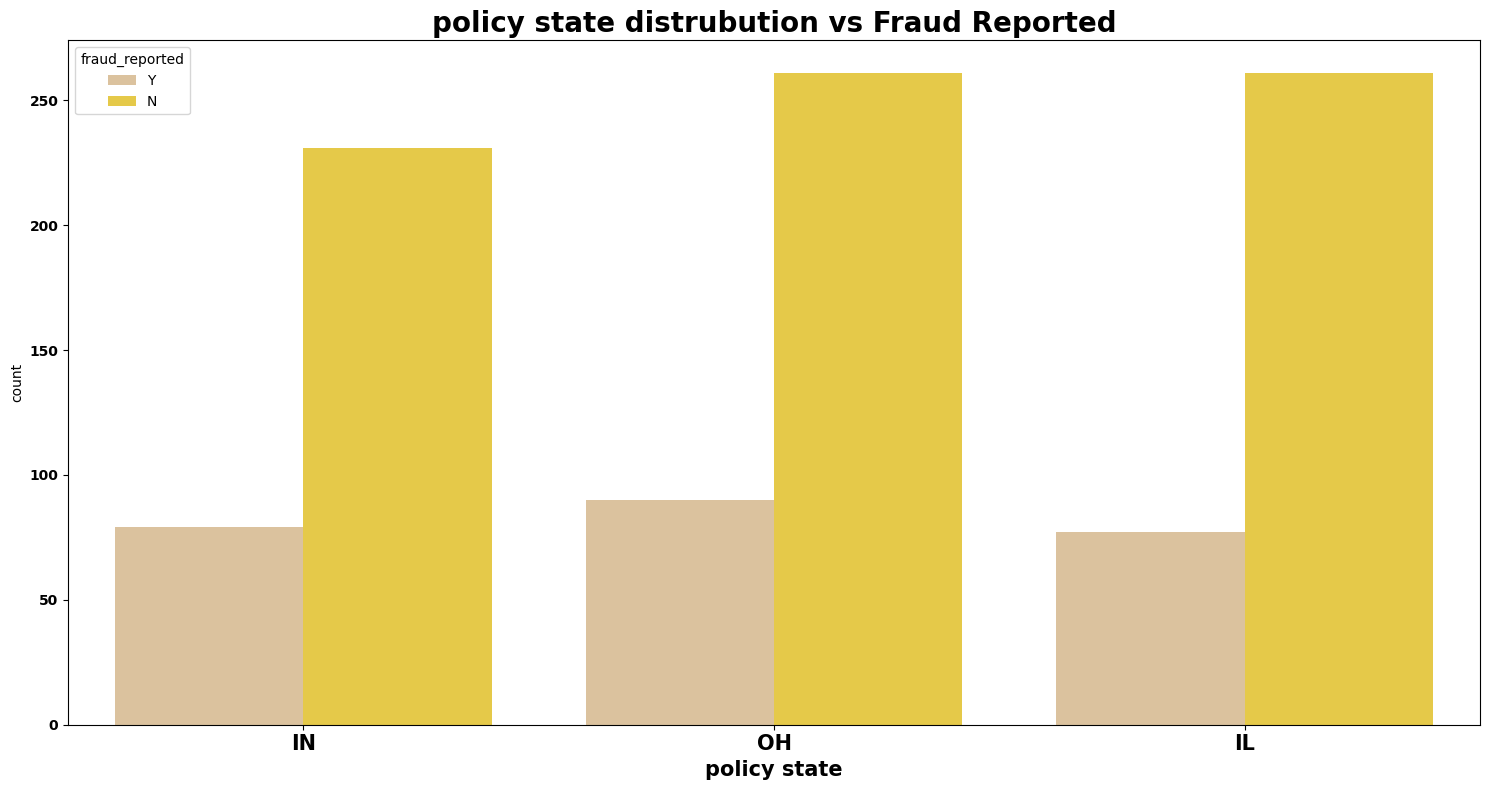

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64


In [66]:
plt.figure(figsize=(15,8))
sns.set_palette('Set2_r')
sns.countplot(x=df['policy_state'],hue=df['fraud_reported'])
plt.title('policy state distrubution vs Fraud Reported',fontweight='bold',fontsize=20)
plt.xlabel('policy state',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['policy_state'].value_counts())

All state have the almost same fraud rate.

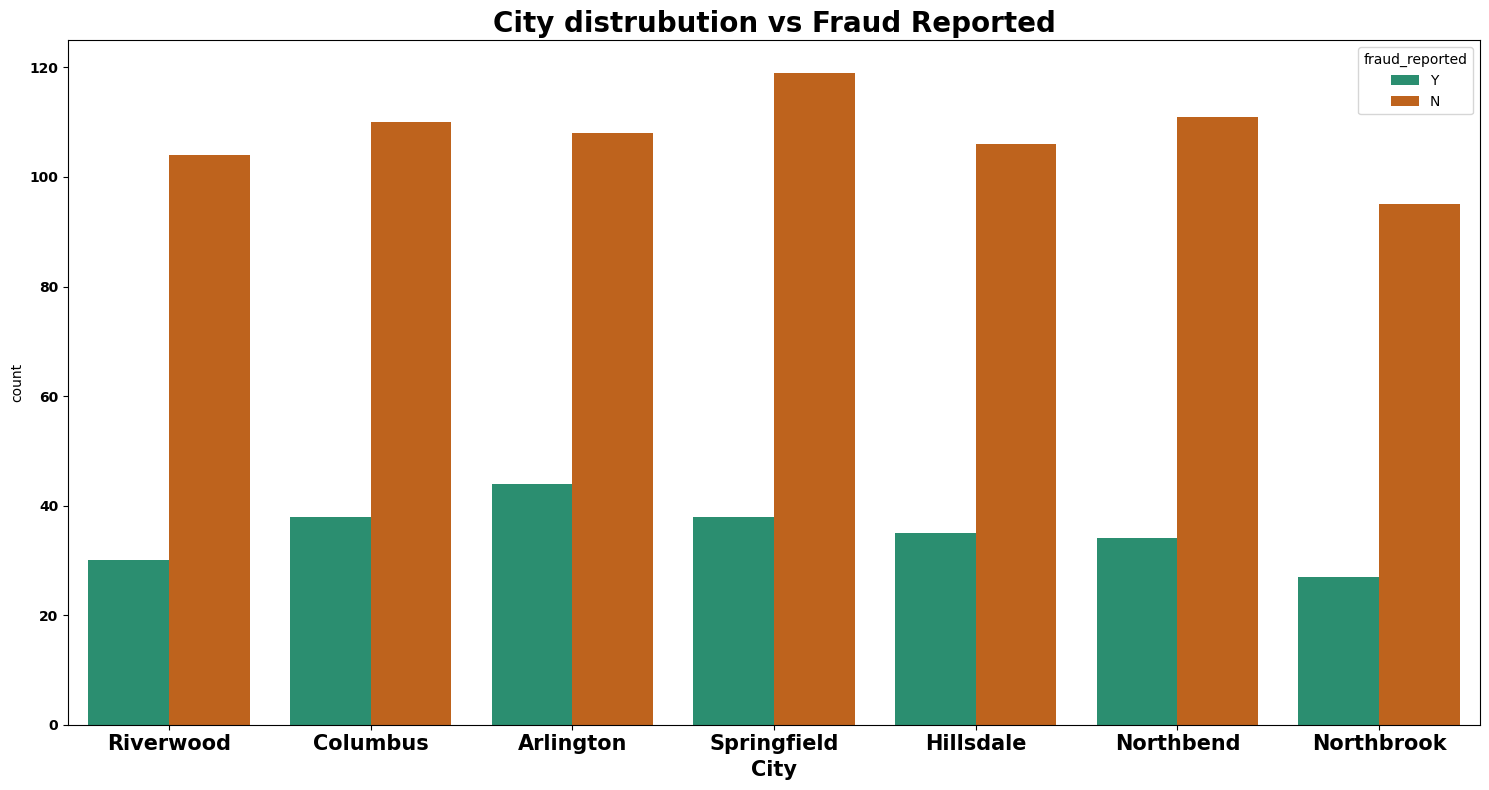

Springfield    157
Arlington      152
Columbus       148
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [70]:
plt.figure(figsize=(15,8))
sns.set_palette('Dark2')
sns.countplot(x=df['incident_city'],hue=df['fraud_reported'])
plt.title('City distrubution vs Fraud Reported',fontweight='bold',fontsize=20)
plt.xlabel('City',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['incident_city'].value_counts())

Most frauds are reported from 'Springfield','Arlington','Columbus'.

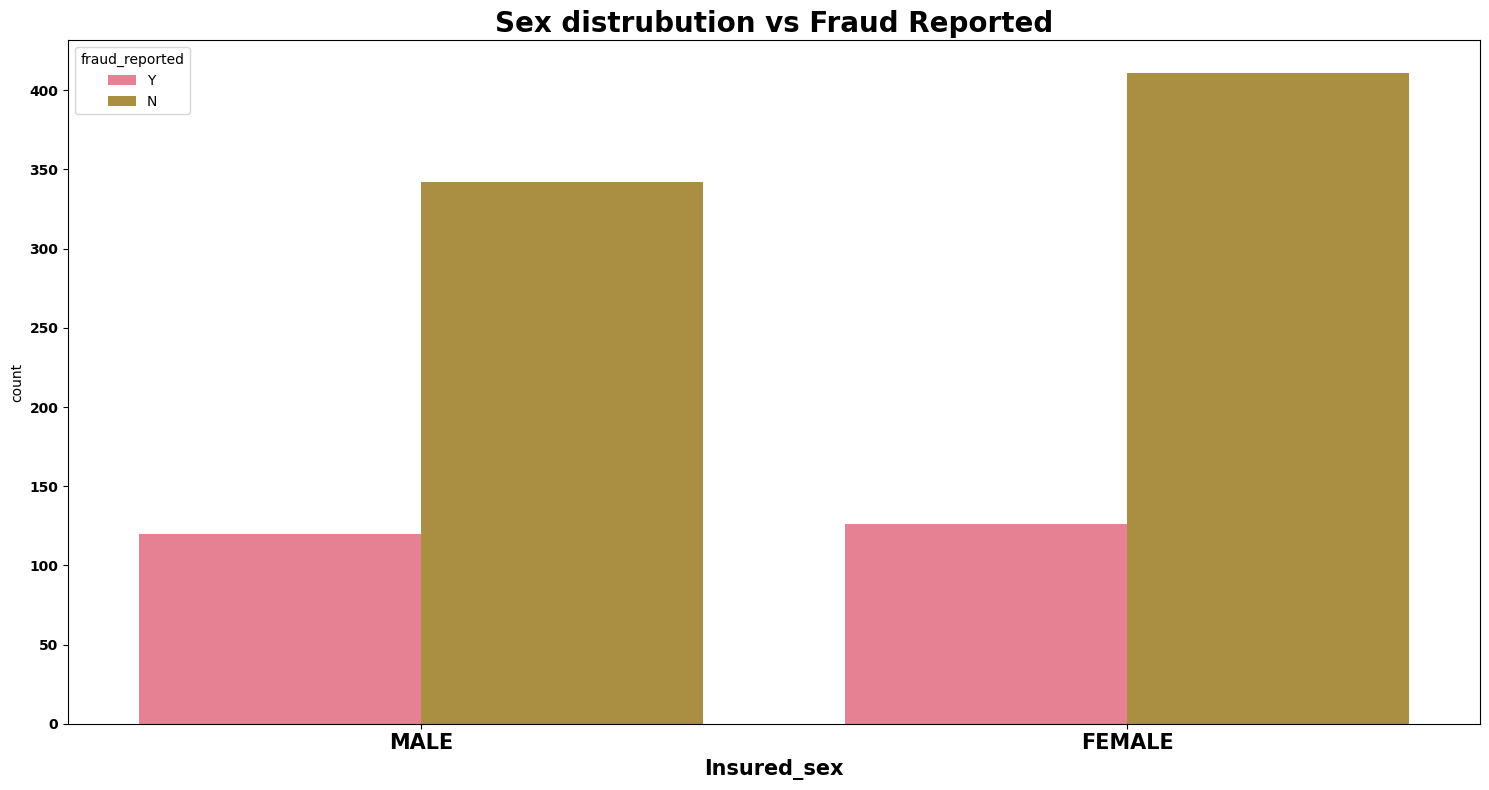

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64


In [72]:
plt.figure(figsize=(15,8))
sns.set_palette('husl')
sns.countplot(x=df['insured_sex'],hue=df['fraud_reported'])
plt.title('Sex distrubution vs Fraud Reported',fontweight='bold',fontsize=20)
plt.xlabel('Insured_sex',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['insured_sex'].value_counts())

Both are almost equal.

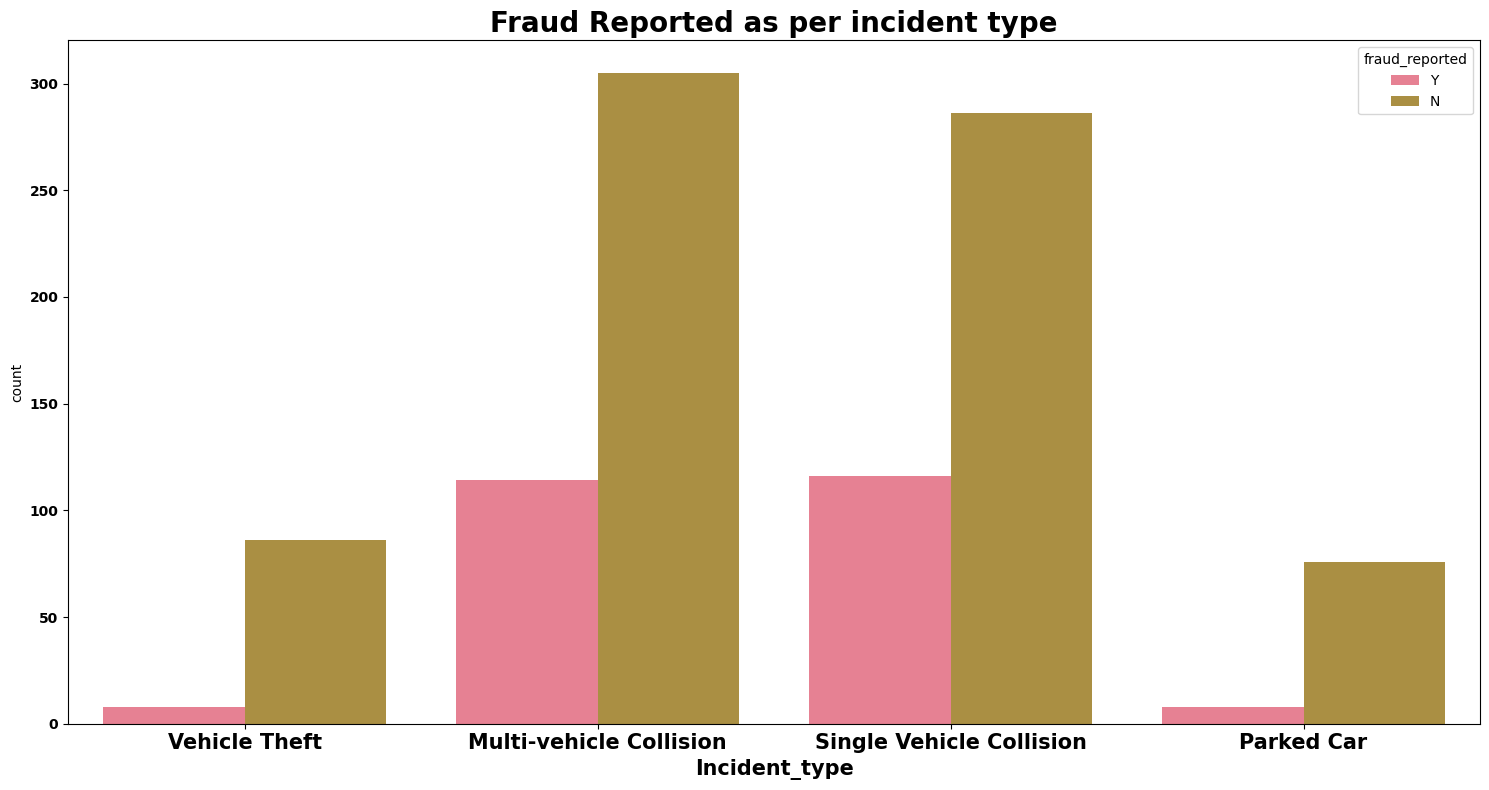

Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [73]:
plt.figure(figsize=(15,8))
sns.set_palette('husl')
sns.countplot(x=df['incident_type'],hue=df['fraud_reported'])
plt.title('Fraud Reported as per incident type',fontweight='bold',fontsize=20)
plt.xlabel('Incident_type',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['incident_type'].value_counts())

* More fraudes are reported for 'Multi-vehicle Collision 'and 'Single Vehicle Collision'.



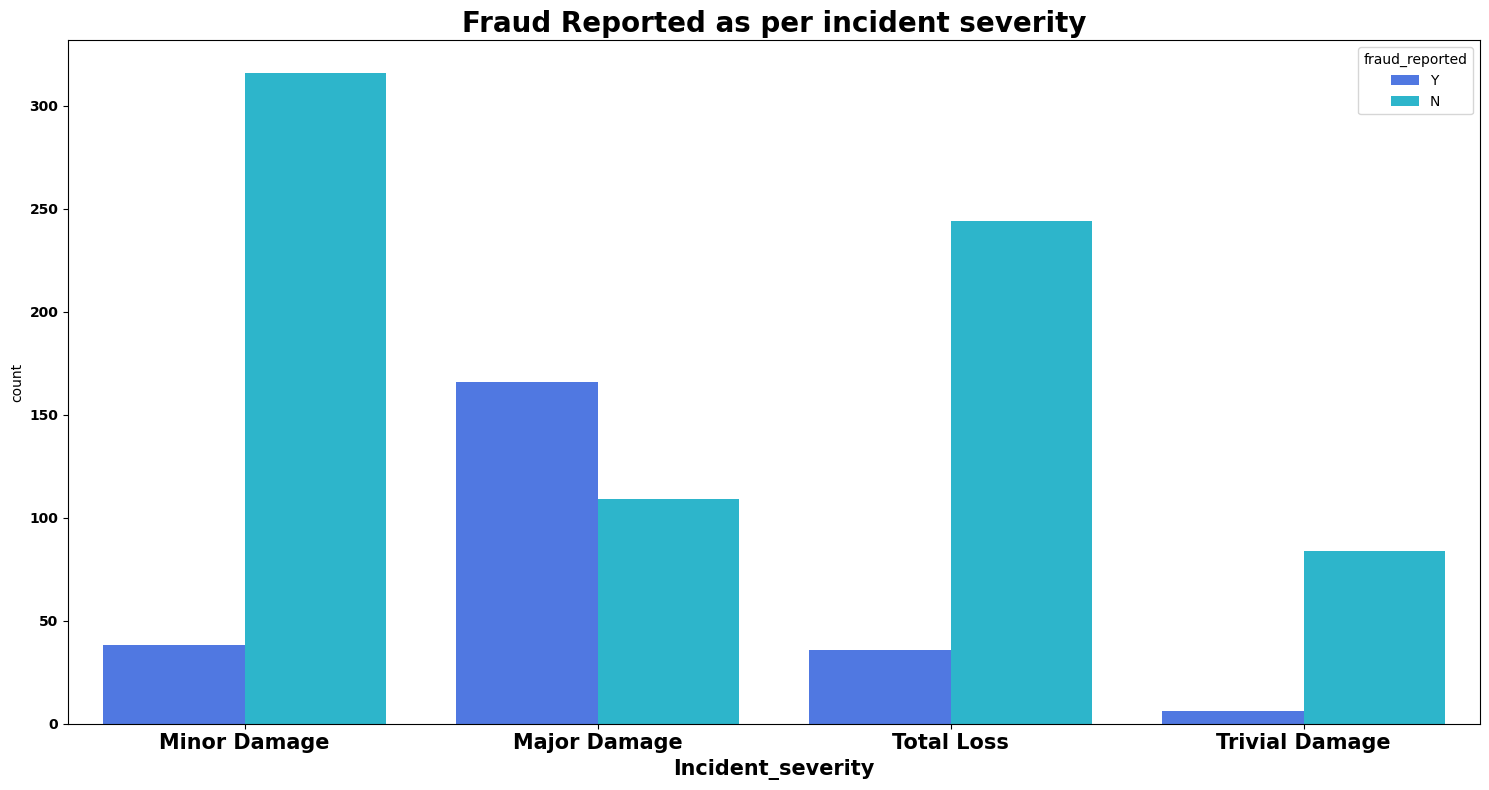

Minor Damage      354
Total Loss        280
Major Damage      275
Trivial Damage     90
Name: incident_severity, dtype: int64


In [80]:
plt.figure(figsize=(15,8))
sns.set_palette('rainbow')
sns.countplot(x=df['incident_severity'],hue=df['fraud_reported'])
plt.title('Fraud Reported as per incident severity',fontweight='bold',fontsize=20)
plt.xlabel('Incident_severity',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['incident_severity'].value_counts())
        

* More frauds are reported for 'major damage'
* Least frauds are reported for 'Trivial Damage'

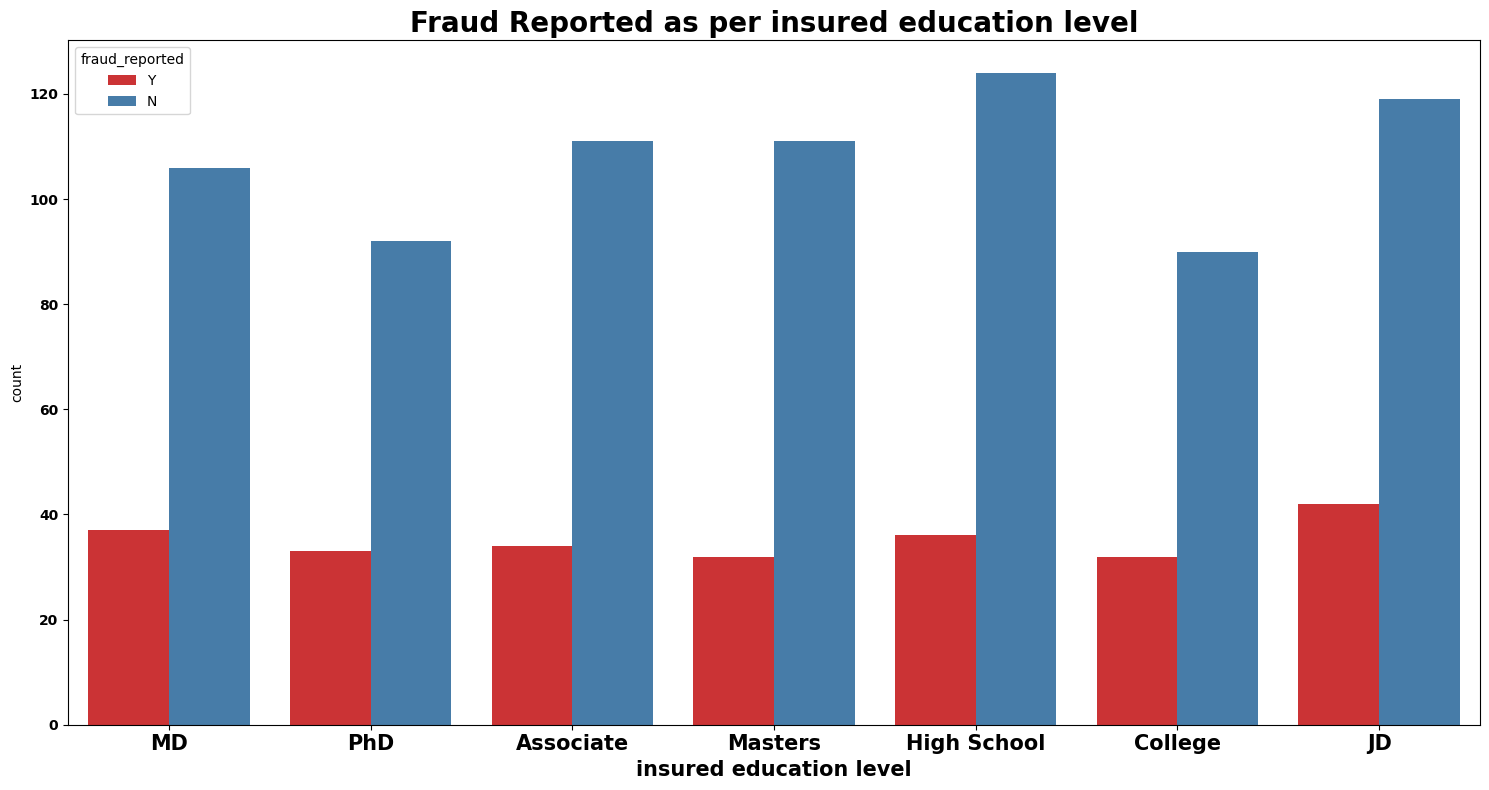

JD             161
High School    160
Associate      145
MD             143
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [83]:
plt.figure(figsize=(15,8))
sns.set_palette('Set1')
sns.countplot(x=df['insured_education_level'],hue=df['fraud_reported'])
plt.title('Fraud Reported as per insured education level',fontweight='bold',fontsize=20)
plt.xlabel('insured education level',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()
print(df['insured_education_level'].value_counts())
        

More frauds are reported for 'JD','High School'.

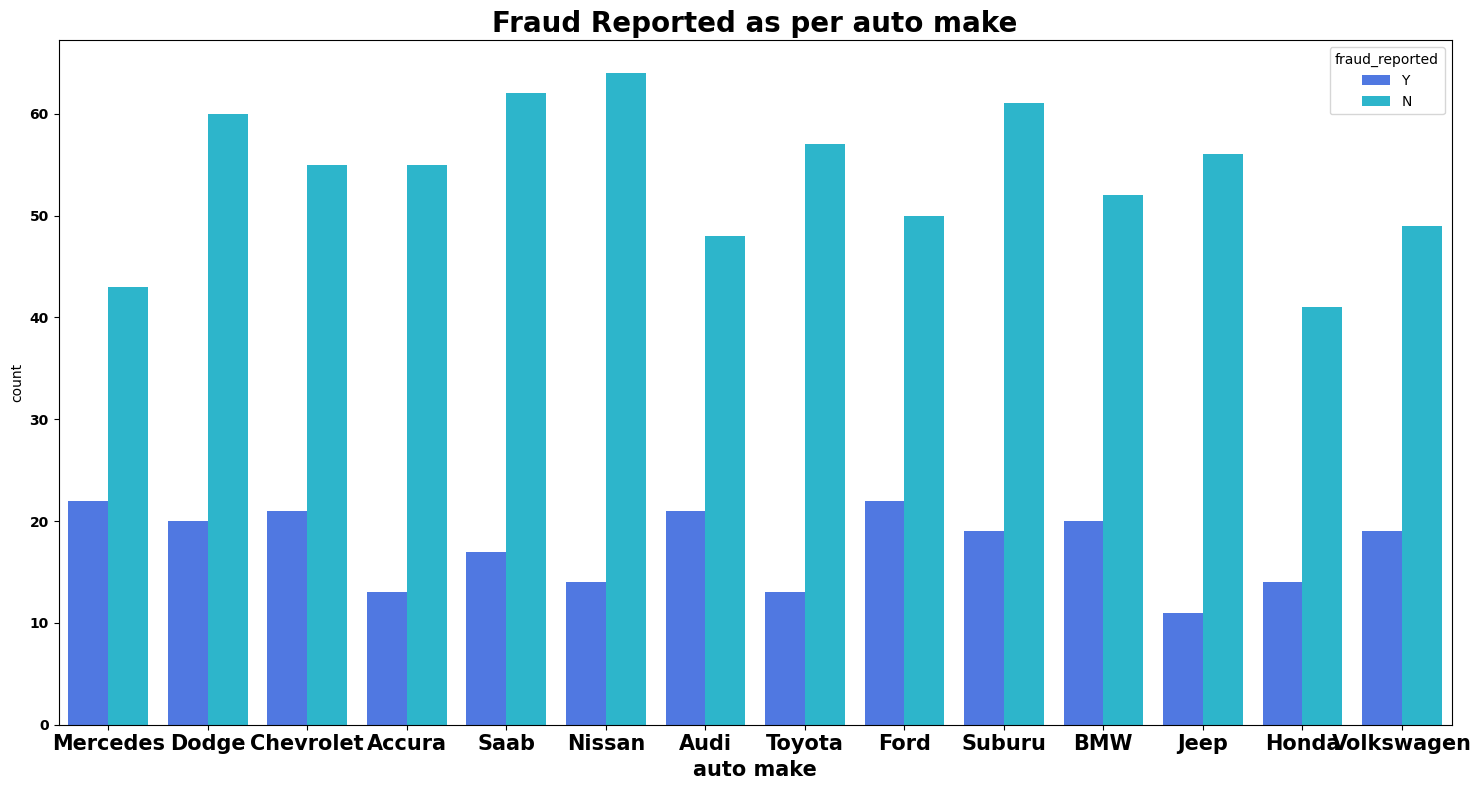

In [91]:
plt.figure(figsize=(15,8))
sns.set_palette('rainbow')
sns.countplot(x=df['auto_make'],hue=df['fraud_reported'])
plt.title('Fraud Reported as per auto make',fontweight='bold',fontsize=20)
plt.xlabel('auto make',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold')
plt.show()


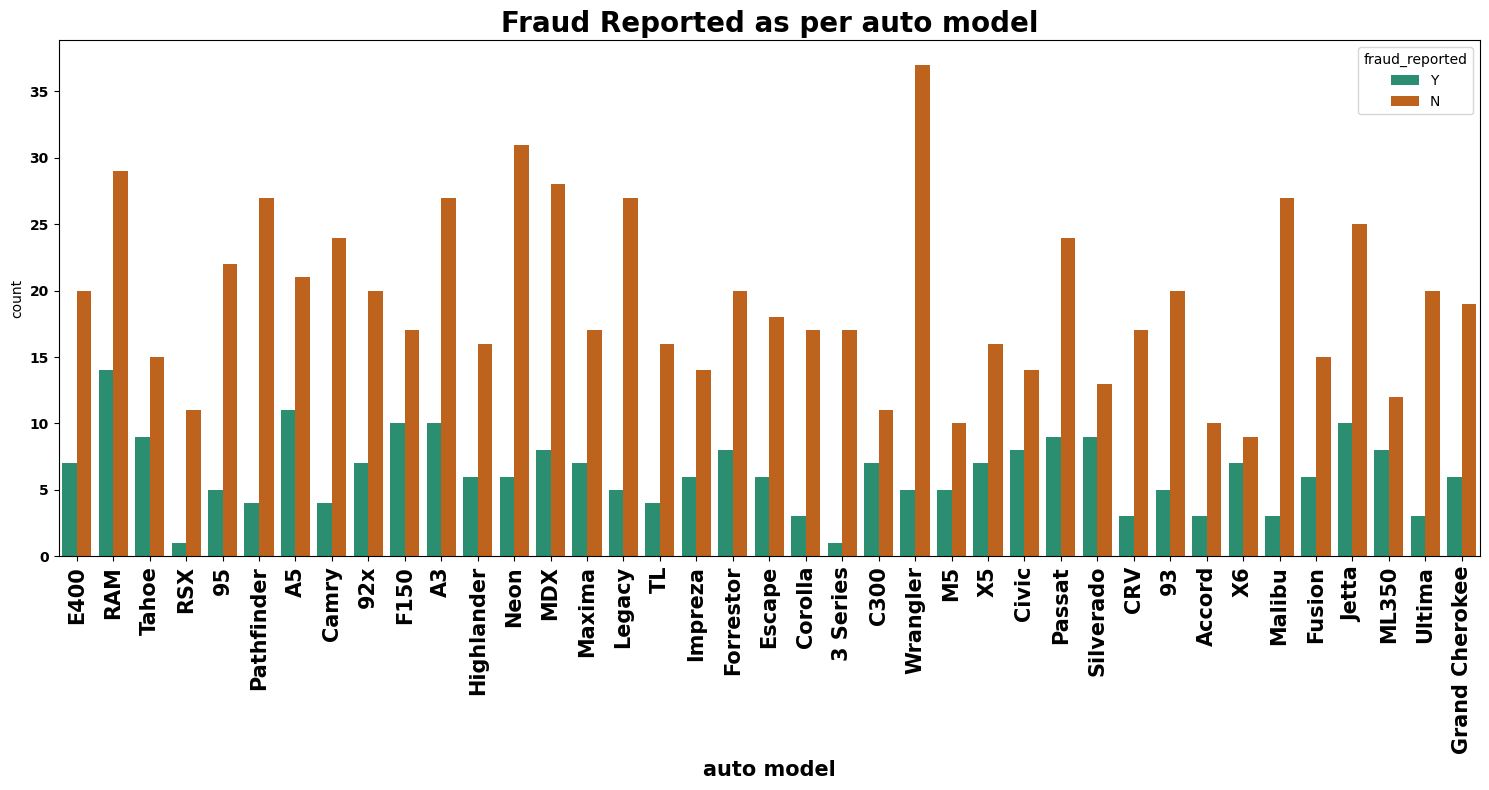

In [97]:
plt.figure(figsize=(15,8))
sns.set_palette('Dark2')
sns.countplot(x=df['auto_model'],hue=df['fraud_reported'])
plt.title('Fraud Reported as per auto model',fontweight='bold',fontsize=20)
plt.xlabel('auto model',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',fontsize=15,rotation=90)
plt.yticks(fontweight='bold')
plt.show()


more fraudes are reported for RAM model and least for 3 Series.

# Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,212,23,257,820,1,1,2,396,5,518,...,0,0,44,46,45,38,8,12,12,1
1,123,10,671,186,2,0,2,739,5,6,...,3,0,143,337,104,116,4,30,12,0
2,239,22,140,765,0,1,2,742,6,811,...,2,0,451,245,249,521,3,34,19,1
3,212,25,286,181,0,2,1,901,6,849,...,1,0,81,70,36,66,0,31,14,0
4,239,20,2,385,2,1,1,641,1,676,...,2,0,463,251,255,531,10,3,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,19,934,487,2,2,1,577,1,19,...,1,0,705,624,379,664,6,6,11,0
995,266,22,101,129,0,0,1,764,1,812,...,3,0,760,630,607,714,13,28,20,0
996,119,15,901,509,2,1,0,691,3,181,...,3,1,507,324,330,554,11,19,1,0
997,377,43,499,572,0,2,2,652,5,157,...,1,1,224,168,170,256,1,5,3,0


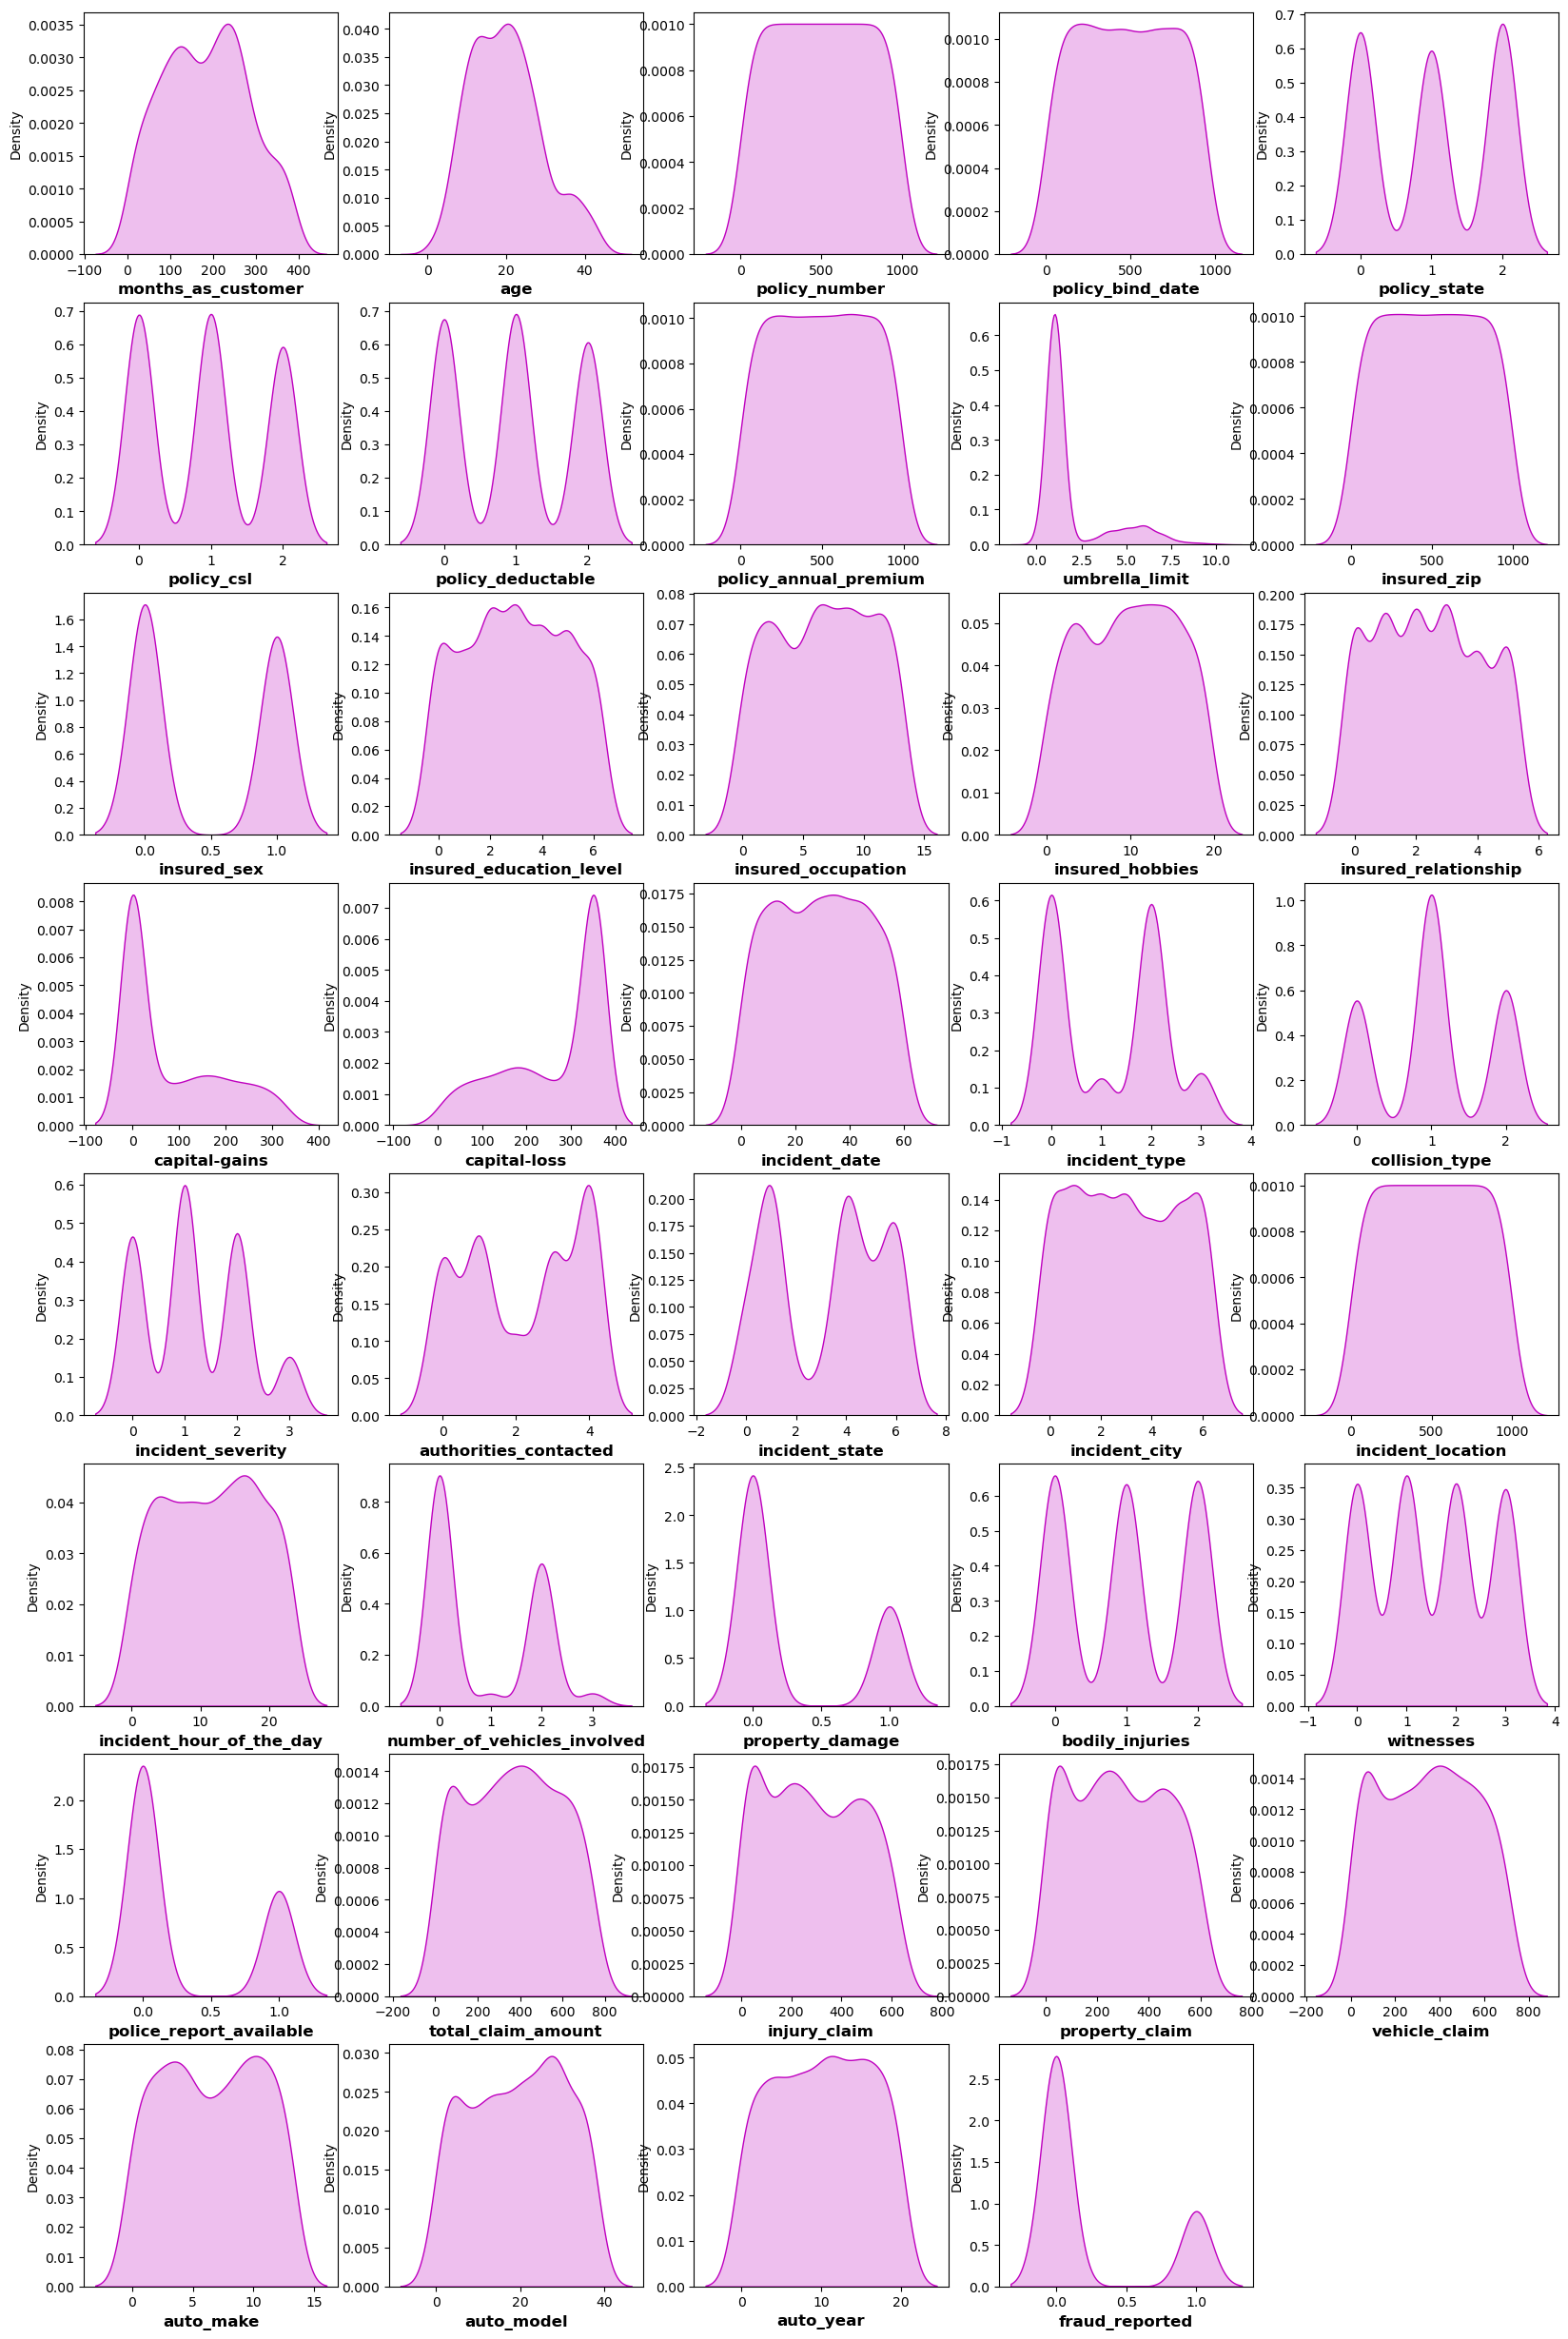

months_as_customer             0.094303
age                            0.481461
policy_number                  0.000000
policy_bind_date               0.005162
policy_state                  -0.024326
policy_csl                     0.089067
policy_deductable              0.063604
policy_annual_premium         -0.004051
umbrella_limit                 1.934433
insured_zip                    0.001689
insured_sex                    0.150802
insured_education_level        0.001298
insured_occupation            -0.060896
insured_hobbies               -0.059941
insured_relationship           0.076349
capital-gains                  0.897869
capital-loss                  -0.808860
incident_date                  0.006708
incident_type                  0.103399
collision_type                -0.032150
incident_severity              0.277762
authorities_contacted         -0.120066
incident_state                -0.147805
incident_city                  0.047574
incident_location              0.000000


In [32]:
#checking for skewness
plt.figure(figsize=(20,35),facecolor='white')
pltnum=1
for col in df:
    if pltnum<=39:
        ax=plt.subplot(9,5,pltnum)
        sns.distplot(df[col],color='m',hist=False,kde_kws={'shade':True})
        plt.xlabel(col,fontsize=12,fontweight='bold')
    pltnum+=1
plt.show()
print(df.skew())

All data are almost normally distriuted.

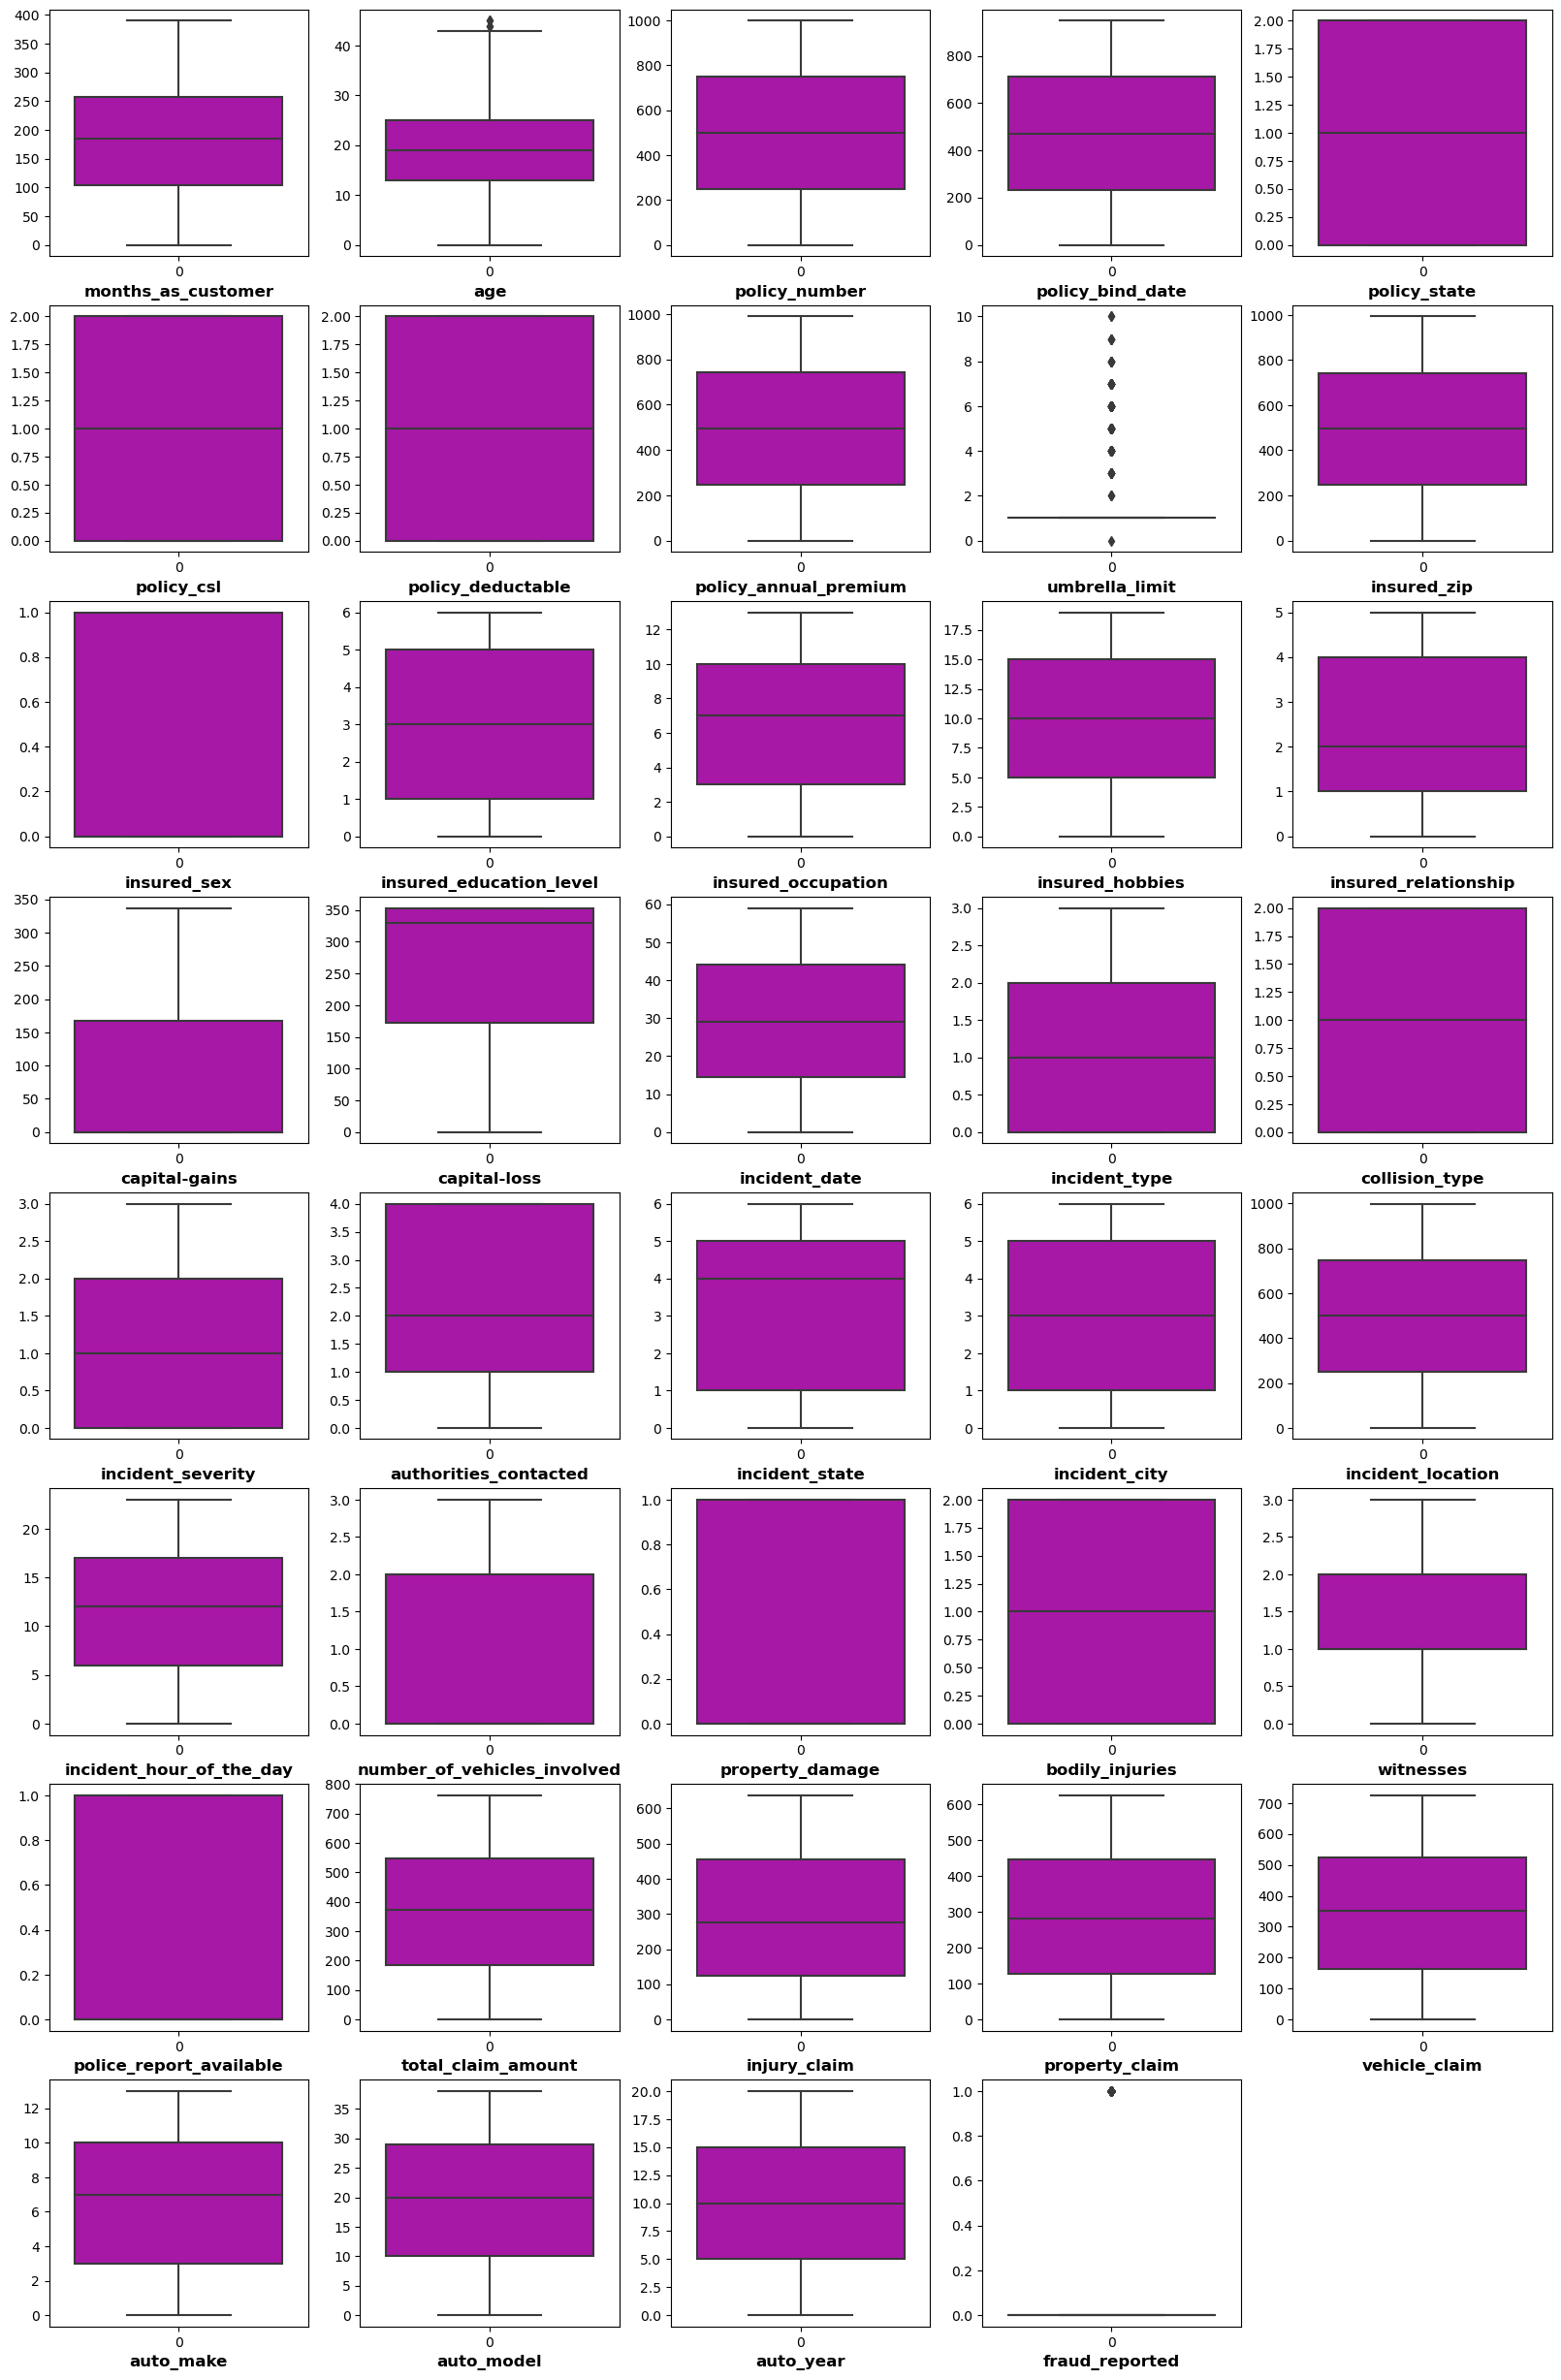

In [33]:
#checking for outliers
plt.figure(figsize=(20,35),facecolor='white')
pltnum=1
for col in df:
    if pltnum<=39:
        ax=plt.subplot(9,5,pltnum)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=12,fontweight='bold')
    pltnum+=1
plt.show()

The columns 'age', 'umbrellla_limit', are having outliers present in the data.

# Removal of outliers

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))

In [27]:
threshold=3
df1=df[(z<3).all(axis=1)]

In [28]:
df1.shape

(984, 39)

In [29]:
lose=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print('percentage of datalose is :',lose)

percentage of datalose is : 1.5015015015015014


# Correlation


In [39]:
df1.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.912119,0.063379,0.049562,-0.009635,-0.025210,0.024459,0.013001,0.021068,0.020892,...,0.056558,-0.020096,0.051232,0.062619,0.024213,0.047449,0.044410,0.005496,0.002135,0.015076
age,0.912119,1.000000,0.064654,0.054938,-0.020521,-0.016196,0.025725,0.016500,0.019358,0.018919,...,0.051402,-0.021524,0.069923,0.076686,0.057931,0.057615,0.031340,0.018206,0.004031,0.011306
policy_number,0.063379,0.064654,1.000000,0.052814,0.073102,0.043086,-0.020747,0.018331,0.004339,-0.000669,...,-0.011112,0.029325,-0.010205,-0.009938,-0.005320,-0.015190,0.023560,0.067290,0.000523,-0.032141
policy_bind_date,0.049562,0.054938,0.052814,1.000000,0.015401,0.006047,-0.013371,-0.033261,-0.022055,-0.035239,...,-0.005769,-0.008285,0.005799,0.019015,0.015787,0.005281,-0.023243,0.003598,0.030305,0.060826
policy_state,-0.009635,-0.020521,0.073102,0.015401,1.000000,0.002943,0.014630,0.014357,-0.010821,0.037305,...,0.023338,0.066773,-0.023544,-0.044350,-0.000667,-0.014341,0.010601,-0.016804,-0.001090,0.033107
policy_csl,-0.025210,-0.016196,0.043086,0.006047,0.002943,1.000000,0.006743,0.019183,0.012880,0.012331,...,0.073637,-0.005258,-0.040431,-0.077192,-0.035234,-0.023429,-0.007645,0.042498,-0.028617,-0.031078
policy_deductable,0.024459,0.025725,-0.020747,-0.013371,0.014630,0.006743,1.000000,0.004693,0.016243,-0.016050,...,0.079590,0.033736,0.021019,0.029376,0.061410,0.003267,-0.027118,-0.004758,0.026320,0.006031
policy_annual_premium,0.013001,0.016500,0.018331,-0.033261,0.014357,0.019183,0.004693,1.000000,-0.009557,0.042725,...,0.008773,0.017833,-0.005914,-0.021832,-0.013772,0.004740,0.003042,-0.033081,-0.034154,-0.020259
umbrella_limit,0.021068,0.019358,0.004339,-0.022055,-0.010821,0.012880,0.016243,-0.009557,1.000000,0.003192,...,-0.002840,-0.033466,-0.044901,-0.051479,-0.016898,-0.044101,0.012466,0.016193,0.030554,0.043913
insured_zip,0.020892,0.018919,-0.000669,-0.035239,0.037305,0.012331,-0.016050,0.042725,0.003192,1.000000,...,0.021554,-0.010092,-0.006877,-0.009789,-0.012182,-0.019701,-0.021655,0.031072,-0.032081,0.056627


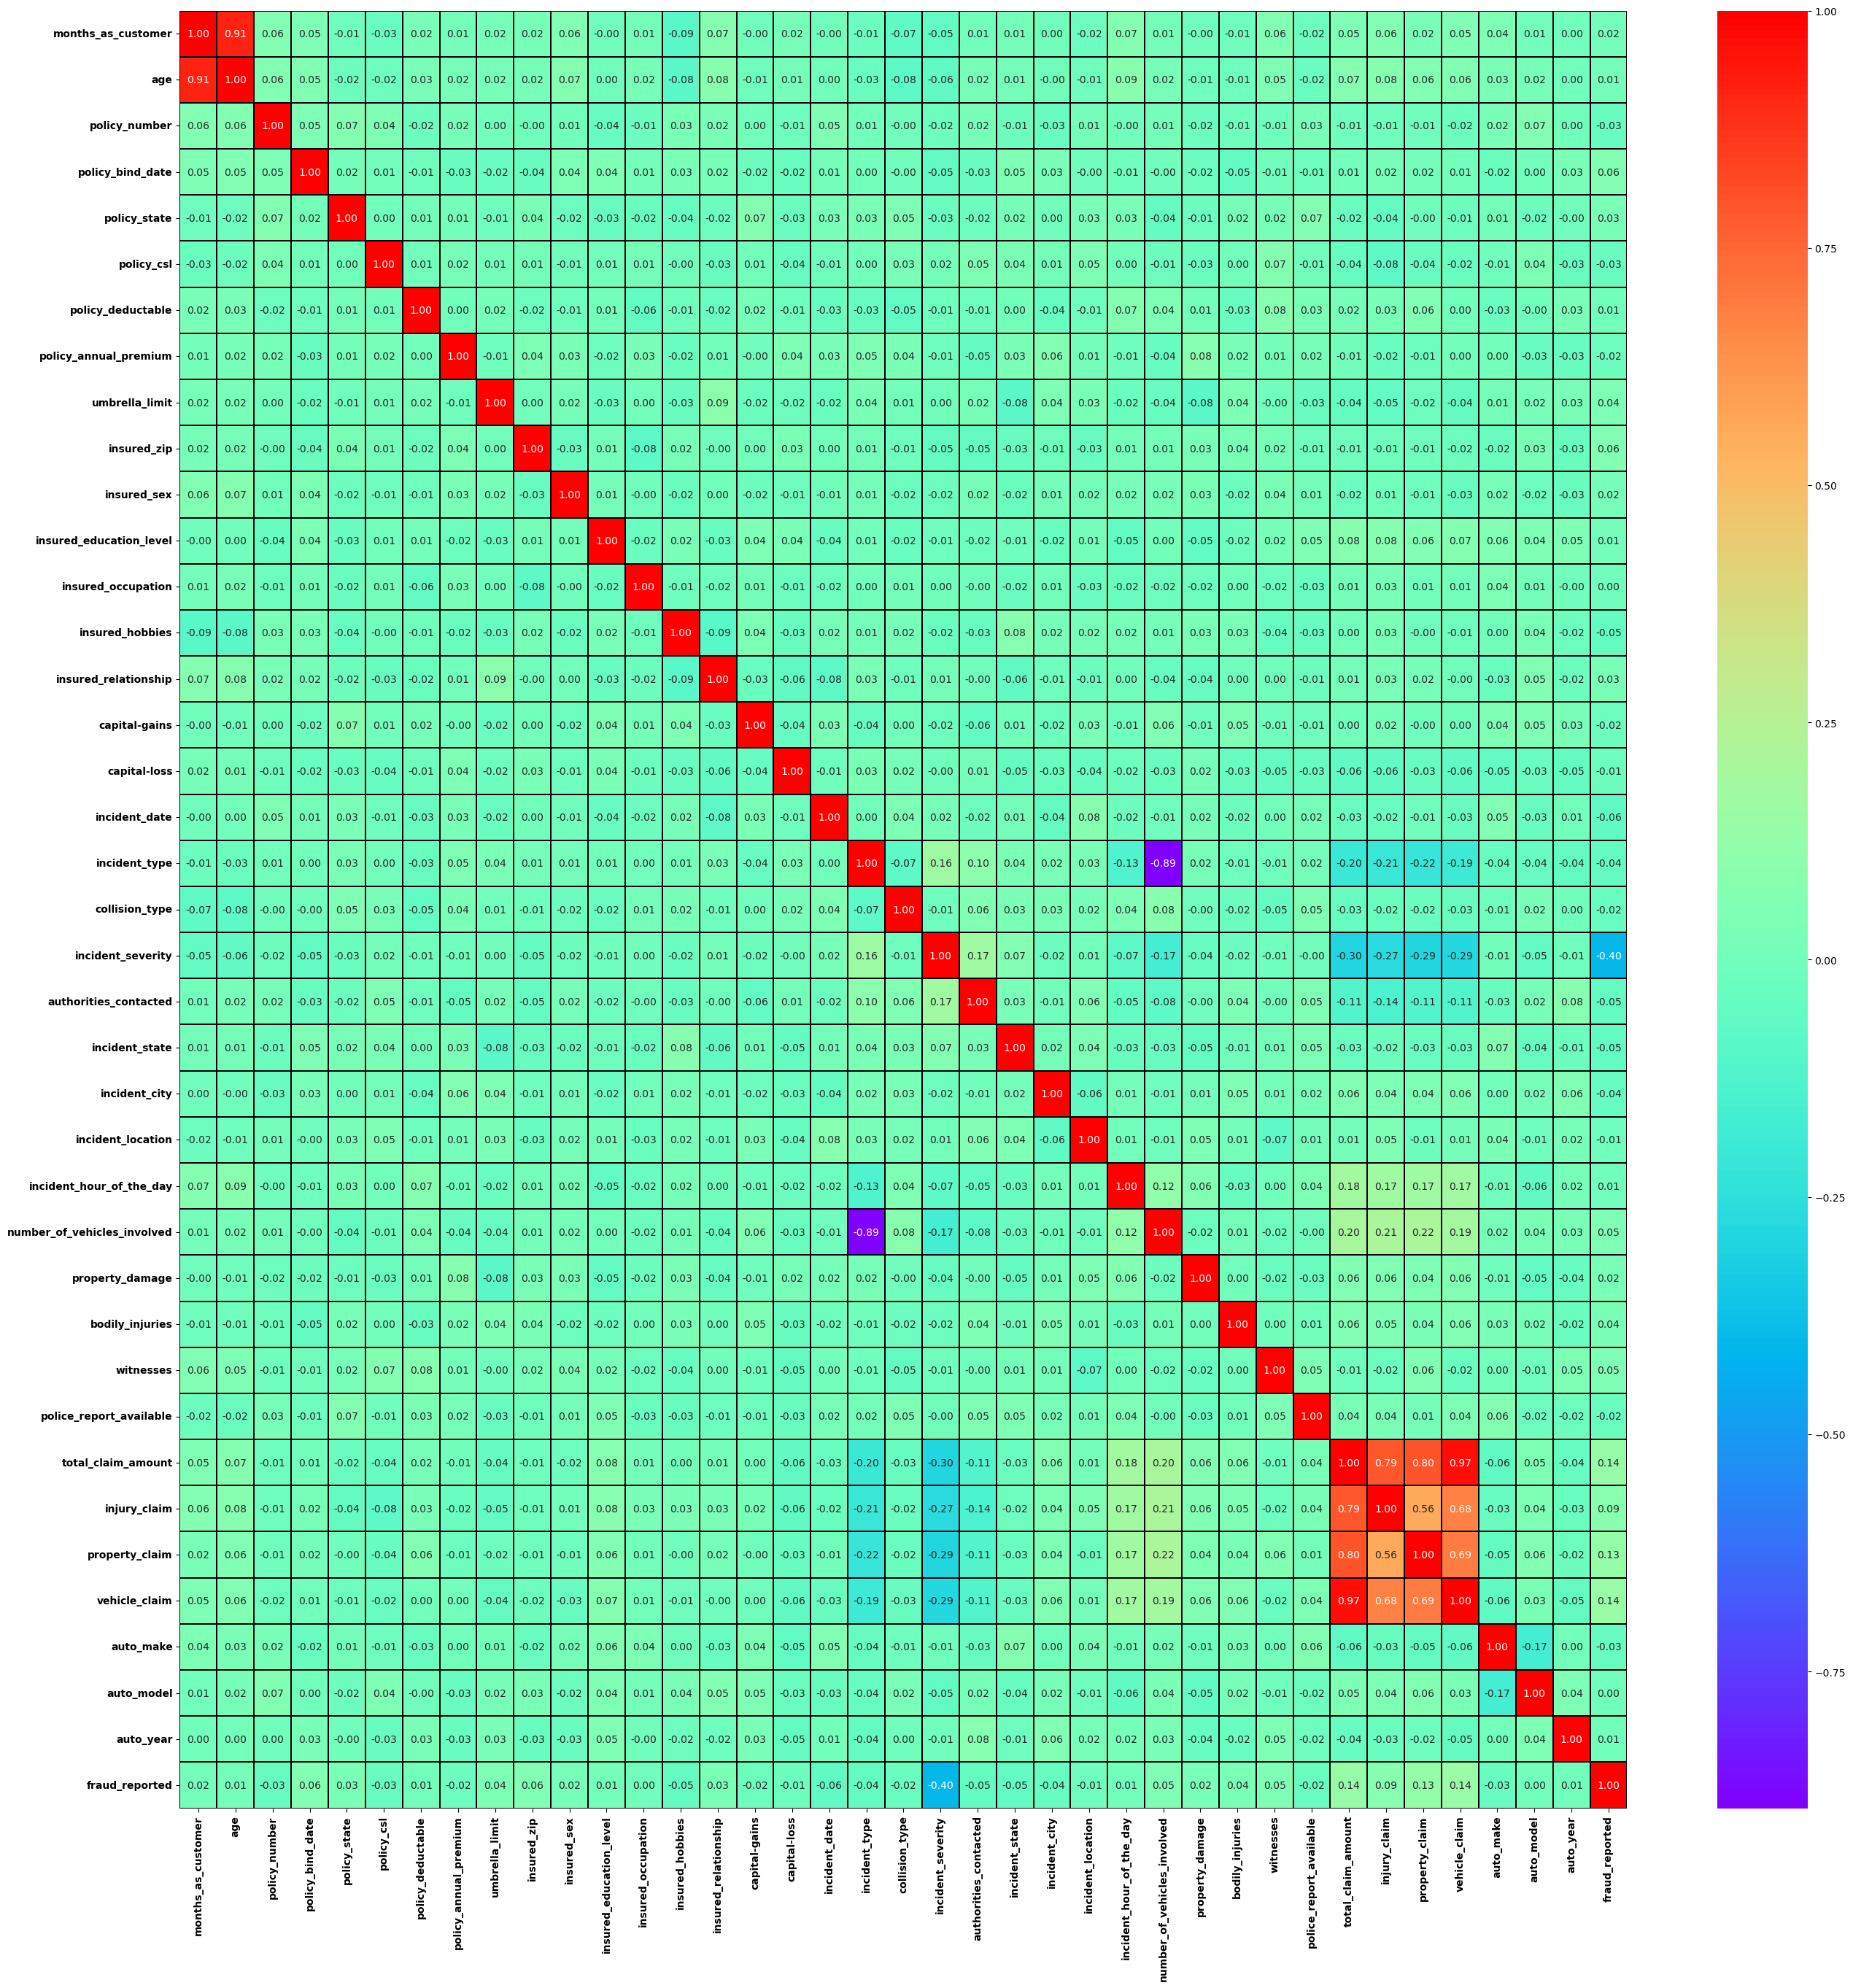

In [43]:
plt.figure(figsize=(32,32))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',linecolor='black',cmap='rainbow',linewidths='0.1')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

* There is hight positive correlation exist between total_claim_amount and vehicle_claim,property_claim,injury_claim.
* incident_severity is negatively correlated with fraud reported,vehicle_claim,property_claim,injury_claim.
* incident_type is negatively correlated with vehicle_claim,property_claim,injury_claim, total_claim_amount.
* incident_type is highly negatively correlated with number of vehicles involved.


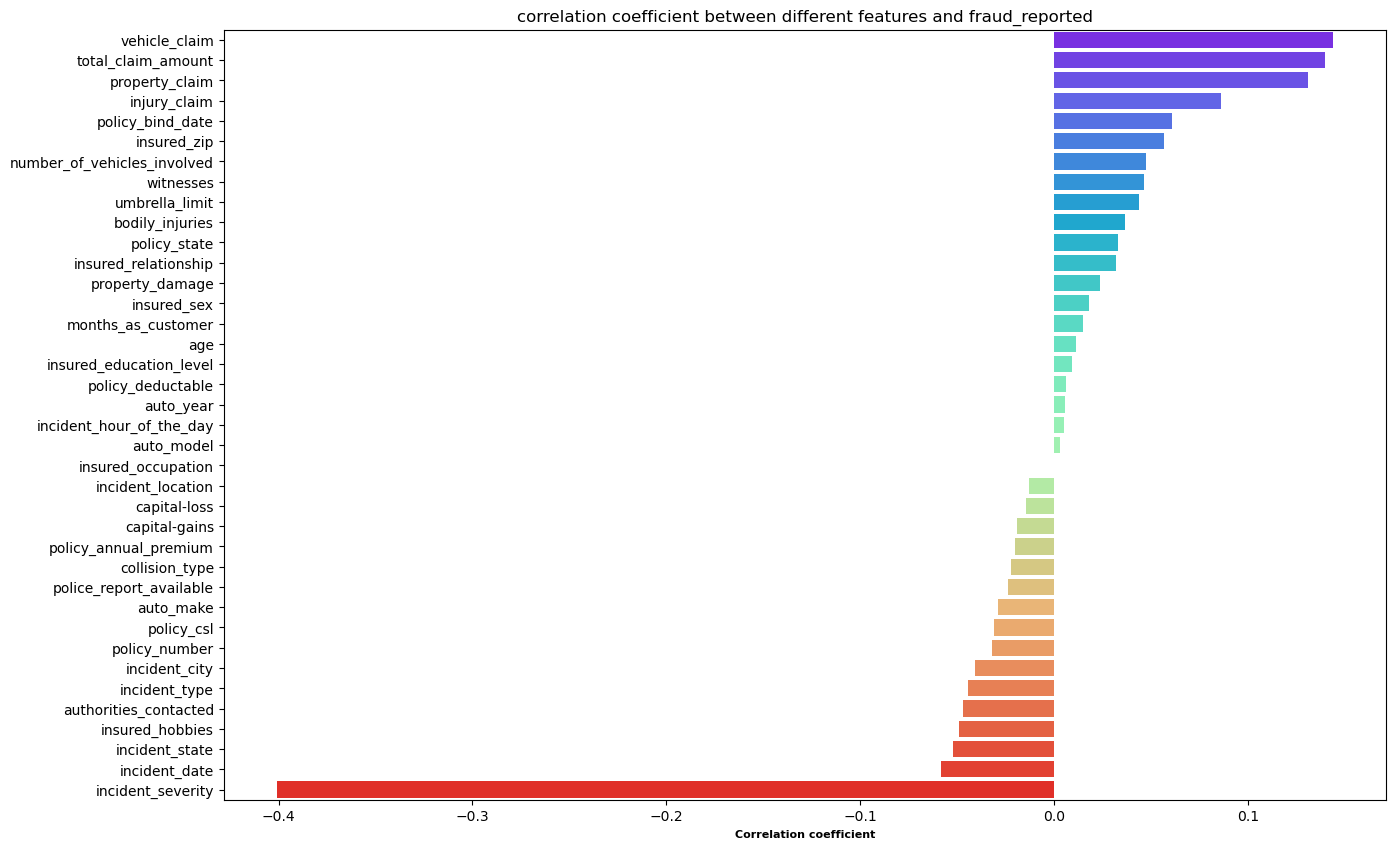

In [46]:
plt.figure(figsize=(15,10))
data=df1.corr()['fraud_reported'].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr,y=labels,palette='rainbow')
plt.title('correlation coefficient between different features and fraud_reported')
plt.xlabel('Correlation coefficient',fontweight='bold',fontsize=8)

plt.show()

Fraud repoted is:                                                                                                               
* highly positivly correlated with vehicle_claim,total_claim_amount,property claim
* highly negative correlated with incident_severity.

In [30]:
#spliting the data
x=df1.drop(columns=['fraud_reported'])
y=df1['fraud_reported']

In [31]:
x.shape,y.shape

((984, 38), (984,))

# Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
st=StandardScaler()

In [34]:
X=st.fit_transform(x)

In [35]:
X=pd.DataFrame(X,columns=x.columns)

# Multicollinearity

Varience_inflation_factor is used to check for multicollinearity

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif=pd.DataFrame()
vif['features list']=X.columns
vif['vif value']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
vif


,features list,vif value
0,months_as_customer,6.066054
1,age,6.096779
2,policy_number,1.035587
3,policy_bind_date,1.029545
4,policy_state,1.037985
5,policy_csl,1.033699
6,policy_deductable,1.034384
7,policy_annual_premium,1.033581
8,umbrella_limit,1.040431
9,insured_zip,1.047615


Here 'total_claim_amount','vehicle_claim' is having high vif value so we will drop this columns.

In [41]:
x1=X.drop(columns=['total_claim_amount','vehicle_claim'])

In [43]:
x1.shape

(984, 36)

# PCA

In [44]:
from sklearn.decomposition import PCA

In [48]:
pca=PCA()
X1=pca.fit_transform(x1)
X1=pd.DataFrame(X1,columns=x1.columns)

In [50]:
vif=pd.DataFrame()
vif['features list']=X1.columns
vif['vif value']=[variance_inflation_factor(X1.values,i)for i in range(len(X1.columns))]
vif

,features list,vif value
0,months_as_customer,1.0
1,age,1.0
2,policy_number,1.0
3,policy_bind_date,1.0
4,policy_state,1.0
5,policy_csl,1.0
6,policy_deductable,1.0
7,policy_annual_premium,1.0
8,umbrella_limit,1.0
9,insured_zip,1.0


# Model Building

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=.20,random_state=45)

In [53]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),GaussianNB(),DecisionTreeClassifier()]

# Finding best Random State

In [56]:
maxAccu=0
maxRs=0
 
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        
print('Maximum Accuracy Score Is :',maxAccu,'On RandomState :',maxRs)
    

Maximum Accuracy Score Is : 0.8426395939086294 On RandomState : 30


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=.20,random_state=30)

In [58]:
print(x_train.shape,y_train.shape)

(787, 36) (787,)


In [59]:
print(x_test.shape,y_test.shape)

(197, 36) (197,)


# Evaluation metrics for different models

In [65]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('\n')
    print('Evaluation Metrics Of ',m,'is :\n')
    print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test,y_pred))
    print('_'*125)



Evaluation Metrics Of  LogisticRegression() is :

Accuracy Score :
 0.6751269035532995


Confusion Matrix :
 [[126  31]
 [ 33   7]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.18      0.17      0.18        40

    accuracy                           0.68       197
   macro avg       0.49      0.49      0.49       197
weighted avg       0.67      0.68      0.67       197

_____________________________________________________________________________________________________________________________


Evaluation Metrics Of  SVC() is :

Accuracy Score :
 0.6751269035532995


Confusion Matrix :
 [[126  31]
 [ 33   7]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.18      0.17      0.18        40

    accuracy                           0.68       197
   macro avg       0.4

# Cross Validation score

In [64]:
for m in model:
    score=cross_val_score(m,X1,y,cv=5)
    print('\n')
    print('Cross Validation Score of ',m,':\n')
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation :',score.std())
    print('_'*125)




Cross Validation Score of  LogisticRegression() :

Score : [0.78680203 0.7715736  0.74619289 0.8071066  0.80102041]
Mean Score : 0.7825391070133637
Standard Deviation : 0.0219298069722387
_____________________________________________________________________________________________________________________________


Cross Validation Score of  SVC() :

Score : [0.75634518 0.75126904 0.75126904 0.76142132 0.75510204]
Mean Score : 0.7550813218688491
Standard Deviation : 0.0037645820137073116
_____________________________________________________________________________________________________________________________


Cross Validation Score of  KNeighborsClassifier() :

Score : [0.73096447 0.73096447 0.71573604 0.78680203 0.75      ]
Mean Score : 0.7428934010152284
Standard Deviation : 0.024497316775662248
_____________________________________________________________________________________________________________________________


Cross Validation Score of  GradientBoostingClassifier() :


We will go with LogisticRegression model as its giving good cross validation score

# Hyper Parameter Tuning

In [66]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [68]:
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=param,cv=5)
grid.fit(X1,y)
print(grid)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})


In [69]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.7866052004558168


In [71]:
final_model=LogisticRegression(C= 1,class_weight=None,max_iter=100,penalty='l1', solver='liblinear')

In [72]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('Evaluation Metrics Of ',final_model,'is :\n')
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))

Evaluation Metrics Of  LogisticRegression(C=1, penalty='l1', solver='liblinear') is :

Accuracy Score :
 0.6751269035532995


Confusion Matrix :
 [[126  31]
 [ 33   7]]


Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.18      0.17      0.18        40

    accuracy                           0.68       197
   macro avg       0.49      0.49      0.49       197
weighted avg       0.67      0.68      0.67       197



# AUC-ROC curve

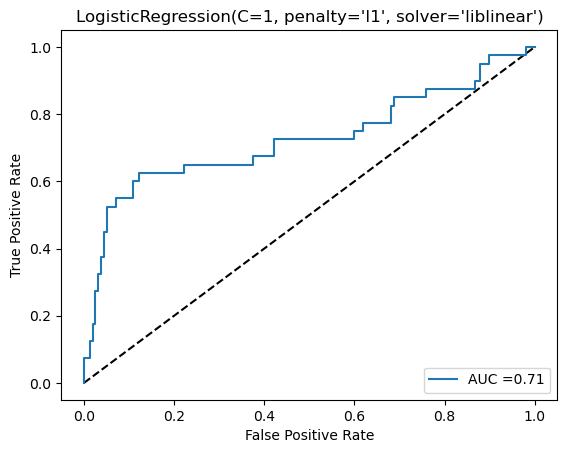

In [73]:
final_model.fit(x_train,y_train)
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC ='+str(round(auc_score,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title(final_model)
plt.show()

# Final Prediction

In [79]:
prediction=final_model.predict(x_test)
actual=np.array(y_test)
def_pred=pd.DataFrame()
def_pred['Predicted Fraud reported']=prediction
def_pred['Actual Fraud reported']=actual
def_pred

,Predicted Fraud reported,Actual Fraud reported
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
192,0,0
193,0,0
194,1,1
195,0,1


In [80]:
def_pred['Predicted Fraud reported']=def_pred['Predicted Fraud reported'].replace({0:'No',1:'Yes'})
def_pred['Actual Fraud reported']=def_pred['Actual Fraud reported'].replace({0:'No',1:'Yes'})
def_pred

,Predicted Fraud reported,Actual Fraud reported
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No
...,...,...
192,No,No
193,No,No
194,Yes,Yes
195,No,Yes
